<a href="https://colab.research.google.com/github/Alejandro-ZZ/Machine-Learning-UNS/blob/master/1_Cuarteto_de_Anscombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cuarteto de Anscombe**

Seleccionar el dataset correcto para cada pareja de datos:

```
     [ x,  y]
  ------------
  1. [16,  8] 
  2. [ 8,  6]
  3. [16, 10]
  4. [16,  6]
```

Cada punto corresponde a un único dataset. Sin embargo, los parámetros  estadísticos de los cuatro datasets son idénticos. 

| **Propiedad**                    | **Valor**    |
|----------------------------------|--------------|
| Media de "x"                     | 9            |
| Varianza de "x"                  | 11           |
| Media de "y"                     | 7.50         |
| Varianza de "y"                  | 4.125        |
| Correlación entre "x" y "y"      | 0.816        |
| Linea de regresión               | y = 3 + 0.5x |
| Coeficiente de determinación R^2 | 0.67         |


¿Cómo determinar entonces a qué dataset corresponde cada punto?

## **1. Datasets**

In [ ]:
import pandas as pd

# Reads all data
datasets = pd.read_csv('Anscombe.csv')

# Separates data into datasets
dataset_I = datasets[datasets['name'] == 'I'].drop(columns=['name'])
dataset_II = datasets[datasets['name'] == 'II'].drop(columns=['name'])
dataset_III = datasets[datasets['name'] == 'III'].drop(columns=['name'])
dataset_IV = datasets[datasets['name'] == 'IV'].drop(columns=['name'])

### **1.1. Dataset I**

In [ ]:
dataset_I

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


### **1.2. Dataset II**

In [ ]:
dataset_II

,x,y
11,10.0,9.14
12,8.0,8.14
13,13.0,8.74
14,9.0,8.77
15,11.0,9.26
16,14.0,8.10
17,6.0,6.13
18,4.0,3.10
19,12.0,9.13
20,7.0,7.26


### **1.3. Dataset III**

In [ ]:
dataset_III

,x,y
22,10.0,7.46
23,8.0,6.77
24,13.0,12.74
25,9.0,7.11
26,11.0,7.81
27,14.0,8.84
28,6.0,6.08
29,4.0,5.39
30,12.0,8.15
31,7.0,6.42


### **1.4. Dataset IV**

In [ ]:
dataset_IV

,x,y
33,8.0,6.58
34,8.0,5.76
35,8.0,7.71
36,8.0,8.84
37,8.0,8.47
38,8.0,7.04
39,8.0,5.25
40,19.0,12.50
41,8.0,5.56
42,8.0,7.91


## **2. Visualización**

Se procede a graficar cada uno de los datasets para ver como se comporta cada uno.

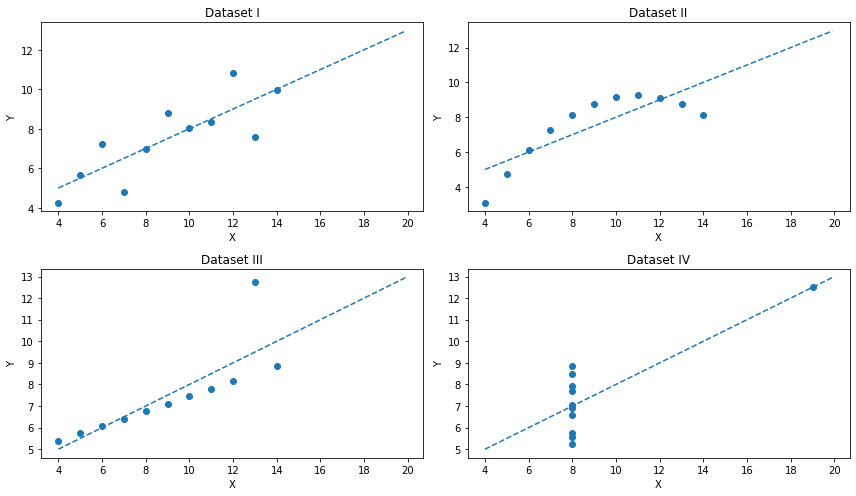

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# All datasets
datasets_dict = {'I': dataset_I, 
                 'II': dataset_II, 
                 'III': dataset_III, 
                 'IV': dataset_IV}

# Grid of 2 rows and columns
fig, axs = plt.subplots(2, 2, figsize=(12,7))

# Regression line
x = np.arange(4, 20, 0.1)
y = 3 + 0.5*x

# Adds each dataset points to an `axs` axis
row, col = 0, 0
for dataset_name, dataset in datasets_dict.items():

  axs[row, col].scatter(dataset['x'], dataset['y'])
  axs[row, col].plot(x, y, '--')
  axs[row, col].set_title('Dataset ' + dataset_name)
  axs[row, col].set_xlabel('X')
  axs[row, col].set_ylabel('Y')

  col += 1
  if col > (len(axs[0]) - 1):
    row += 1
    col = 0

# Displays plots
plt.tight_layout()
plt.show()

Si bien todos los datasets presentan parámetros estadísticos identicos, se observa que su comportamiento difiere para cada uno.


Observese ahora cada uno de los puntos deseados en cada dataset.

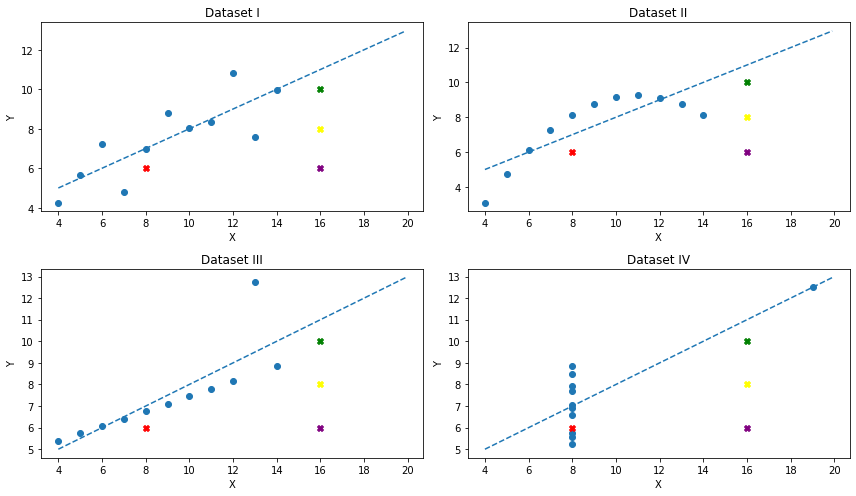

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,7))

row, col = 0, 0
for dataset_name, dataset in datasets_dict.items():

  axs[row, col].scatter(dataset['x'], dataset['y'])
  axs[row, col].plot(x, y, '--')
  axs[row, col].set_title('Dataset ' + dataset_name)
  axs[row, col].set_xlabel('X')
  axs[row, col].set_ylabel('Y')

  axs[row, col].scatter(16, 8, c='yellow',  marker='X')
  axs[row, col].scatter(8, 6, c='red',  marker='X' )
  axs[row, col].scatter(16, 10, c='green',  marker='X' )
  axs[row, col].scatter(16, 6, c='purple',  marker='X')

  col += 1
  if col > (len(axs[0]) - 1):
    row += 1
    col = 0

plt.tight_layout()
plt.show()

* `dataset_I`, se observa que los puntos **rojo**, **amarillo** y **verde** podrian encajar para la tendencia que muestran los datos.

* `dataet_II`, el punto que mejor encaja es el **morado**.

* `dataset_III`, los puntos probables podrian ser el **rojo** y **verde**.

* `dataset_IV`, el punto mas acorde es el **rojo**.

Analizado lo anterior, se eligen los puntos de la siguiente manera:

  * `dataet_I`: amarillo (16, 8)
  * `dataet_II`: morado (16, 6)
  * `dataet_III`: verde (16, 10)
  * `dataet_IV`: rojo (8, 6)

## **Conclusión**

* Dentro del análisis de datos es fundamental conocer el comportamiento, distribución, tendencia de los mismos de manera gráfica. 

* Esta práctica es beneficiosa ya que parte del cerebro permite analizar de mejor manera la información de forma gráfica. Por otro lado, se logra poner en contexto desiciones que se deseen tomar aún cuando los datos numéricos no permite ver con claridad una posible opción.